In [14]:
#imorting the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import LeakyReLU

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from IPython.display import display
from PIL import Image

import numpy as np
from keras.preprocessing import image

import matplotlib.pyplot as plt

In [20]:
#Initialize the CNN
classifier = Sequential()

#Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, 
                             input_shape = (64, 64, 3)))
               
classifier.add(LeakyReLU(alpha=0.1))

#step 2 - pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#step 3 - Flattening
classifier.add(Flatten())

#step 4 - Full Connection
classifier.add(Dense(output_dim = 128))

classifier.add(LeakyReLU(alpha=0.1))

classifier.add(Dense(output_dim = 6, 
                     activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

#Fitting the CNN to the images
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        horizontal_flip = False)

test_datagen = ImageDataGenerator(
        rescale = 1./255)

C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3...)`
  
C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=128)`
C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=6)`


In [21]:
training_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/Dataset6/train_set6',
        target_size = (64, 64),
        batch_size = 32,
        class_mode = 'categorical')

test_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/Dataset6/test_set6',
        target_size = (64, 64),
        batch_size = 32,
        class_mode = 'categorical')

Found 2133 images belonging to 6 classes.
Found 814 images belonging to 6 classes.


In [22]:
#Training the network

history = classifier.fit_generator(
        training_set,
        steps_per_epoch = 100,
        epochs = 5,
        validation_data = test_set,
        validation_steps = 10)

Epoch 1/5
100/100 [==============================] - 190s 2s/step - loss: 0.8877 - acc: 0.7597 - val_loss: 0.2285 - val_acc: 0.9437
Epoch 2/5
100/100 [==============================] - 122s 1s/step - loss: 0.1199 - acc: 0.9712 - val_loss: 0.1135 - val_acc: 0.9594
Epoch 3/5
100/100 [==============================] - 130s 1s/step - loss: 0.0354 - acc: 0.9950 - val_loss: 0.0751 - val_acc: 0.9834
Epoch 4/5
100/100 [==============================] - 144s 1s/step - loss: 0.0225 - acc: 0.9959 - val_loss: 0.0191 - val_acc: 0.9969
Epoch 5/5
100/100 [==============================] - 140s 1s/step - loss: 0.0083 - acc: 0.9994 - val_loss: 0.0133 - val_acc: 0.9969


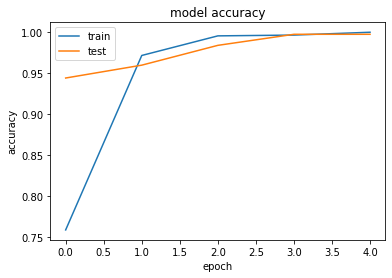

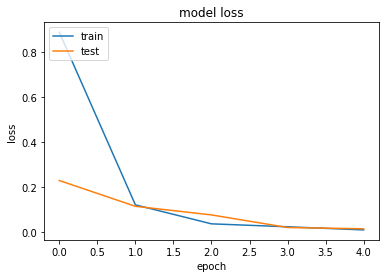

In [23]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
# save model and architecture to single file
classifier.save("model.newh6")
print("Saved model to disk")

Saved model to disk


[5]


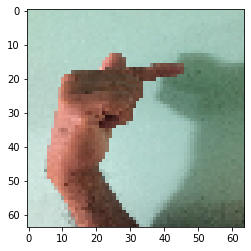

In [69]:
test_image = load_img('C:/Users/ASUS/Desktop/Research/Image Dataset/6/IMG_4830.jpg', target_size = (64, 64))

test_image = test_image.rotate(-90)

plt.imshow(test_image)

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict_classes(test_image)

print(result)

#training_set.class_indices

In [70]:
if result == 0:
    prediction = 'Sign 1'
elif result == 1:
    prediction = 'Sign 2'
elif result == 2:
    prediction = 'Sign 3'
elif result == 3:
    prediction = 'Sign 4'
elif result == 4:
    prediction = 'Sign 5'
elif result == 5:
     prediction = 'Sign 6'

print(prediction)

Sign 6
